## Author: Dhanya M A
### GripApril22
## The Sparks Foundation
Data Science And Business Analytics
### Task 5: Exploratory Data Analysis - Terrorism
### Task Details:
    1. Perform EDA on the GT dataset
    2. Find hotzones of terrorism
    3. Insights from the EDA
    4. Storyboards - charts and graphs

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import shutil
import os
%matplotlib inline

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
import folium
import folium.plugins
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML, display
#import networkx as nx
from matplotlib.animation import FuncAnimation

### Read the data

In [3]:
# now read your csv file 
gtd = pd.read_csv('globalterrorismdb_0718dist.csv')

In [4]:
gtd

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Data Inspection

In [5]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
gtd.describe().round()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.0,181691.0,181691.0,181691.0,181691.0,181691.0,177135.0,177134.0,181685.0,...,1.350000e+03,563.0,774.0,552.0,10991.0,10400.0,181691.0,181691.0,181691.0,181691.0
mean,2.002705e+11,2003.0,6.0,16.0,0.0,132.0,7.0,23.0,-459.0,1.0,...,3.172530e+06,578487.0,717944.0,240.0,5.0,-29.0,-5.0,-4.0,0.0,-4.0
std,1.325957e+09,13.0,3.0,9.0,0.0,112.0,3.0,19.0,204779.0,1.0,...,3.021157e+07,7077924.0,10143920.0,2941.0,2.0,66.0,5.0,5.0,1.0,5.0
min,1.970000e+11,1970.0,0.0,0.0,0.0,4.0,1.0,-53.0,-86185896.0,1.0,...,-9.900000e+01,-99.0,-99.0,-99.0,1.0,-99.0,-9.0,-9.0,-9.0,-9.0
25%,1.991021e+11,1991.0,4.0,8.0,0.0,78.0,5.0,12.0,5.0,1.0,...,0.000000e+00,0.0,-99.0,0.0,2.0,-99.0,-9.0,-9.0,0.0,-9.0
50%,2.009022e+11,2009.0,6.0,15.0,0.0,98.0,6.0,31.0,43.0,1.0,...,1.500000e+04,0.0,0.0,0.0,4.0,0.0,-9.0,-9.0,0.0,0.0
75%,2.014081e+11,2014.0,9.0,23.0,0.0,160.0,10.0,35.0,69.0,1.0,...,4.000000e+05,0.0,1273.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0
max,2.017123e+11,2017.0,12.0,31.0,1.0,1004.0,12.0,75.0,179.0,5.0,...,1.000000e+09,132000000.0,275000000.0,48000.0,7.0,2769.0,1.0,1.0,1.0,1.0


In [7]:
gtd['country_txt'].nunique()

205

In [8]:
gtd['region_txt'].nunique()

12

### Descriptive Data Analysis

In [9]:
gtd['country_txt'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
North Korea              1
International            1
Falkland Islands         1
South Vietnam            1
Wallis and Futuna        1
Name: country_txt, Length: 205, dtype: int64

In [10]:
gtd['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [11]:
gtd['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [12]:
gtd['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [13]:
gtd['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

### Visual Data Analysis

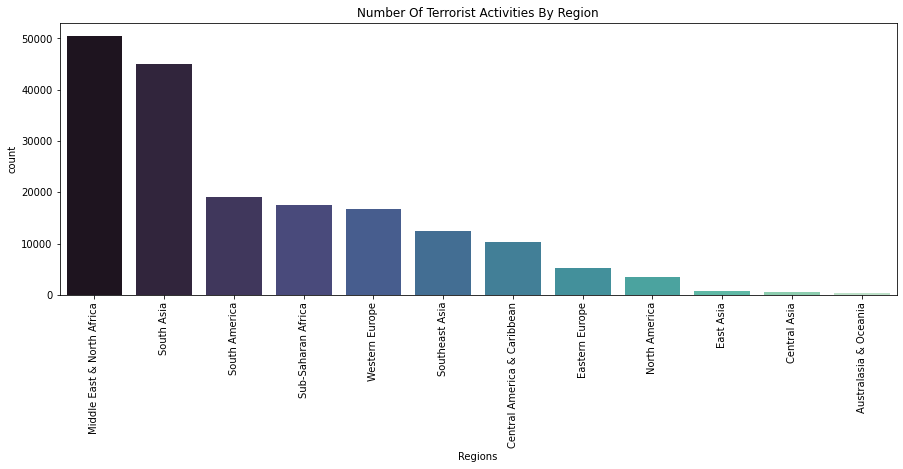

In [14]:
plt.subplots(figsize=(15,5))
sns.countplot('region_txt',data=gtd,palette='mako',order=gtd['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

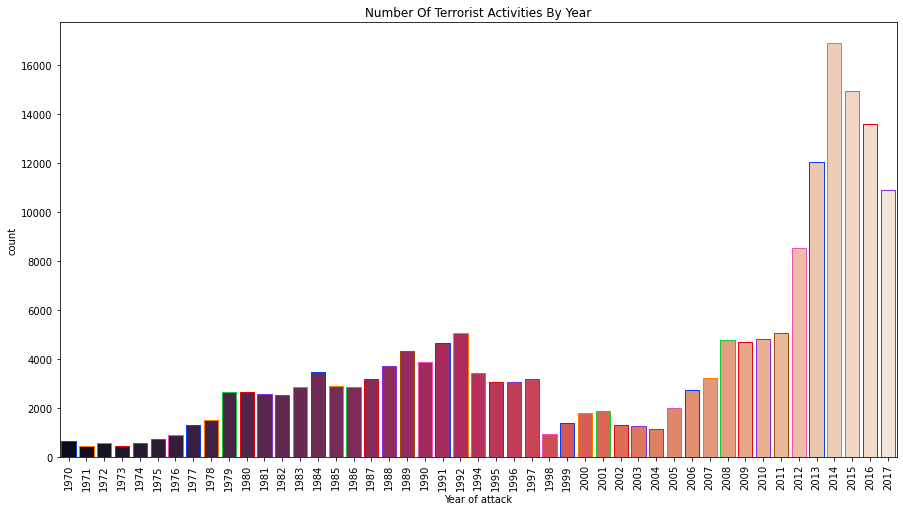

In [15]:
plt.subplots(figsize=(15,8))
sns.countplot('iyear',data=gtd,palette='rocket',edgecolor=sns.color_palette('bright',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities By Year')
plt.show()

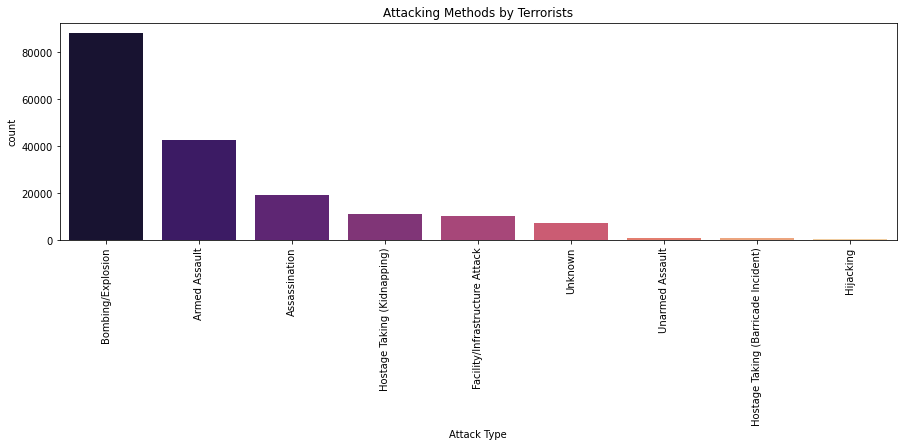

In [16]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype1_txt',data=gtd,palette='magma',order=gtd['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

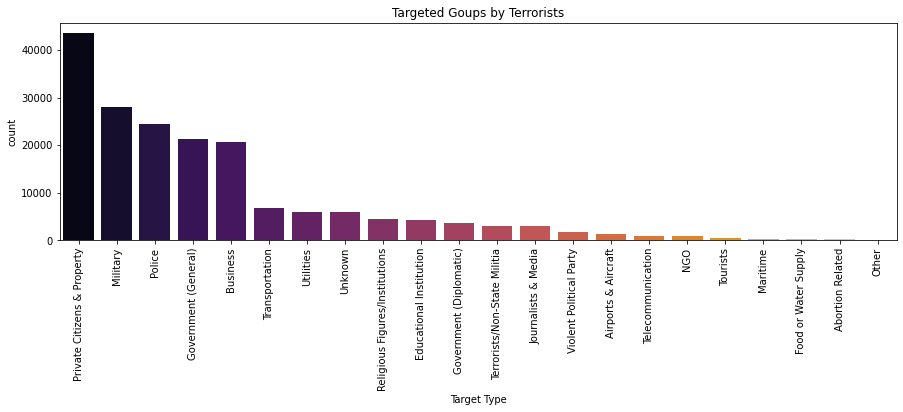

In [17]:
plt.subplots(figsize=(15,4))
sns.countplot('targtype1_txt',data=gtd,palette='inferno',order=gtd['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Targeted Goups by Terrorists')
plt.show()

## Conclusion: Hot zones in terrorism
### 1. Country : Iraq
### 2. Region  : Middle East & North Africa
### 3. Type of attack : Bombing/Explosion
### 4. Target  : Private citizens and Property

### Analyze by topmost hot zone

In [18]:
gtdIraq=gtd[gtd['country_txt']=='Iraq']

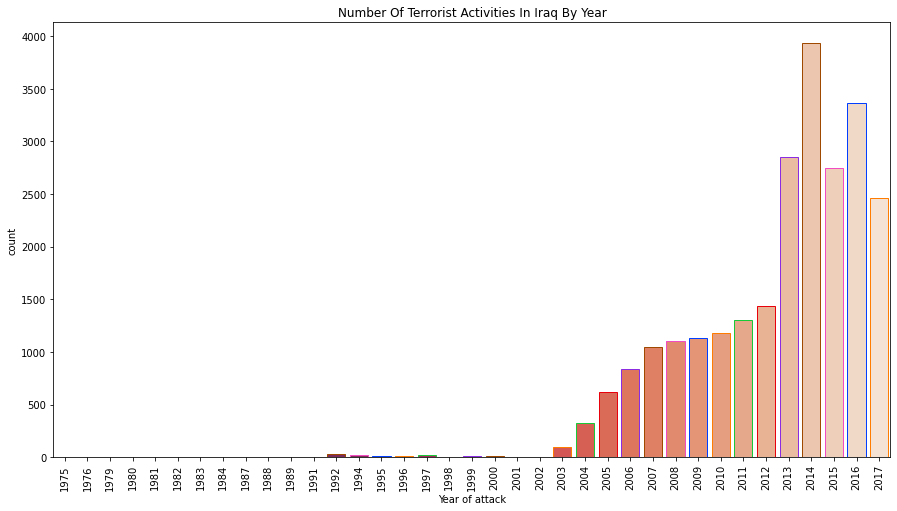

In [19]:
plt.subplots(figsize=(15,8))
sns.countplot('iyear',data=gtdIraq,palette='rocket',edgecolor=sns.color_palette('bright',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities In Iraq By Year')
plt.show()

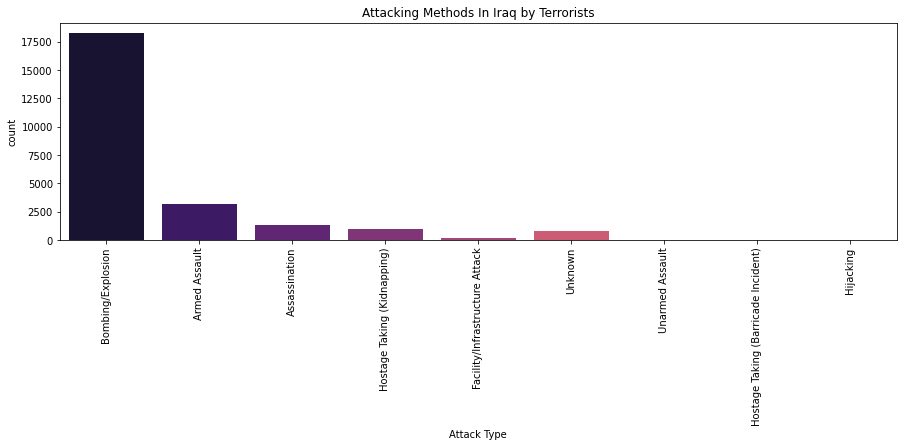

In [20]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype1_txt',data=gtdIraq,palette='magma',order=gtd['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods In Iraq by Terrorists')
plt.show()

### Comparison graphs

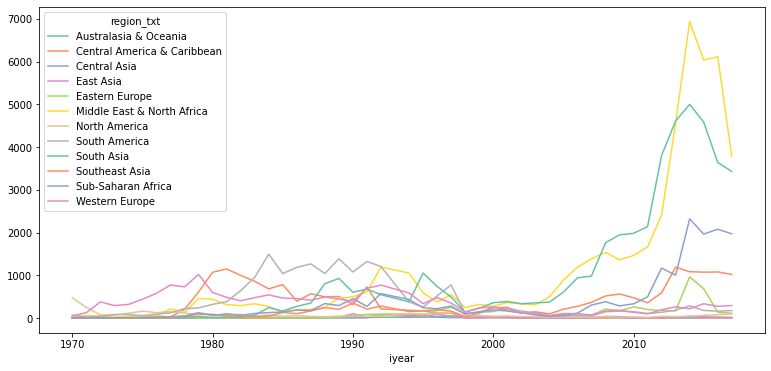

In [21]:
df_region=pd.crosstab(gtd.iyear,gtd.region_txt)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

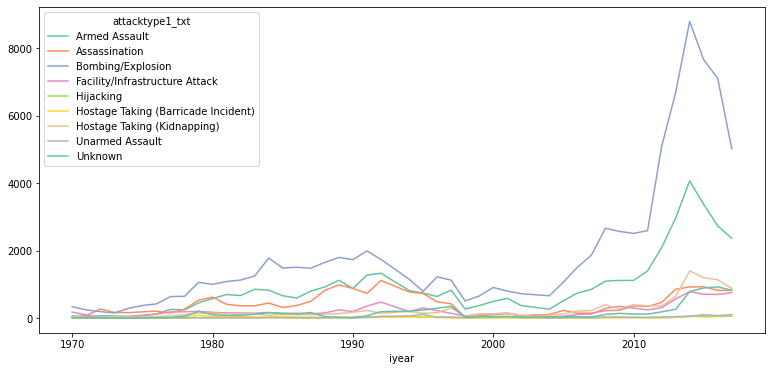

In [22]:
df_region=pd.crosstab(gtd.iyear,gtd.attacktype1_txt)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

Text(0, 0.5, 'Wounded')

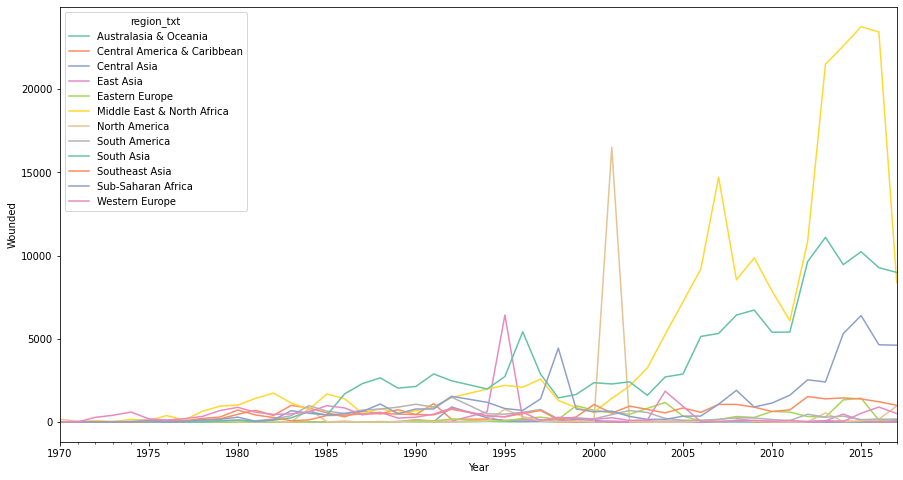

In [23]:
d=gtd.groupby(['iyear','region_txt'])['nwound'].sum()
plot_df = d.unstack('region_txt').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

Text(0, 0.5, 'Killed')

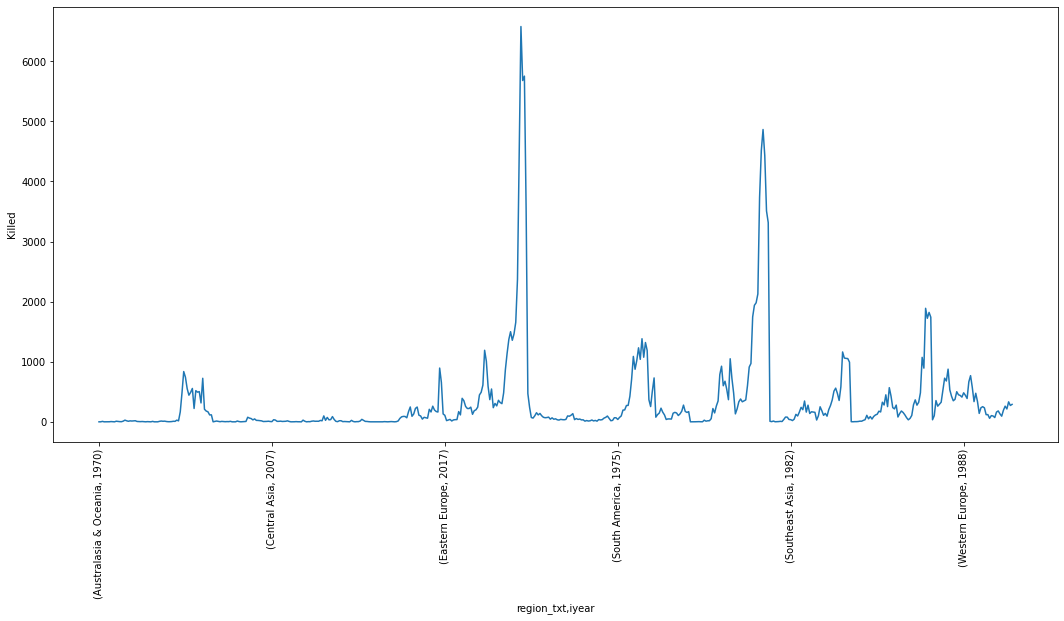

In [24]:
plt.subplots(figsize=(18,8))
gtd.groupby(['region_txt', 'iyear']).count()['nkill'].plot()
plt.xticks(rotation=90)
plt.ylabel("Killed")

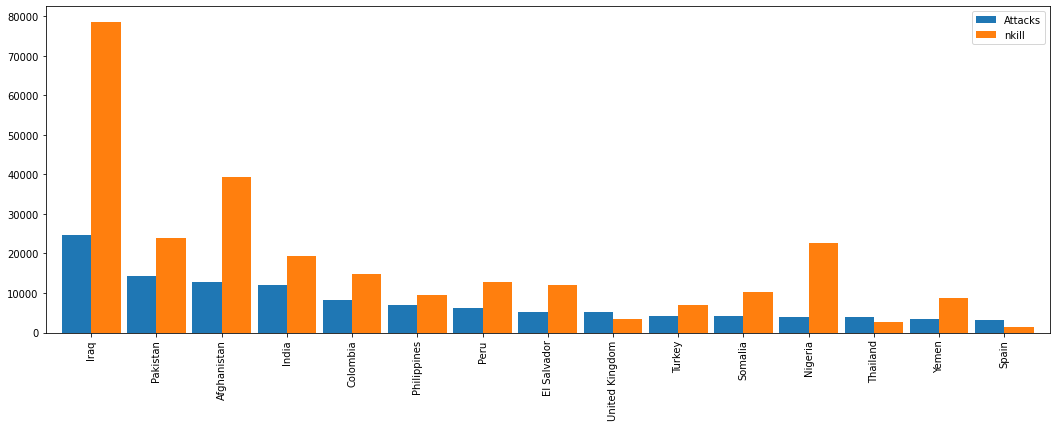

In [25]:
count=gtd['country_txt'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=gtd.groupby('country_txt')['nkill'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Animated display of trend

In [26]:
fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(gtd[gtd['iyear']==Year].latitude)
    long6=list(gtd[gtd['iyear']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(gtd[gtd['iyear']==Year].nkill,gtd[gtd['iyear']==Year].nwound)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(gtd.iyear.unique()), interval = 1500)    

# converting to an html5 video
video = ani.to_html5_video()
  
# embedding for the video
html = display(HTML(video))
  
# draw the animation
plt.close()

In [27]:
fig = plt.figure(figsize = (10,6))
def animate(AttkType):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities By Attack Type'+'\n'+'Attack Type:' +str(AttkType))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(gtd[gtd['attacktype1_txt']==AttkType].latitude)
    long6=list(gtd[gtd['attacktype1_txt']==AttkType].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(gtd[gtd['attacktype1_txt']==AttkType].nkill,gtd[gtd['attacktype1_txt']==AttkType].nwound)],color = 'g')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(gtd.attacktype1_txt.unique()), interval = 1500)    

# converting to an html5 video
video = ani.to_html5_video()
  
# embedding for the video
html = display(HTML(video))
  
plt.close()